# Convergence of upper and lower bound over time

Note that the events in the plot are only based on the upper bound iterations.

In [1]:
import pandas as pd
from _conf import PREPROCESSDED_RESULTS
data = pd.read_json(PREPROCESSDED_RESULTS)
# data = data.drop_duplicates(subset=["instance"])
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0          14           20    FIDE-YASA        t2_m1_null               205   
1          52          109    FIDE-YASA        t2_m1_null               289   
2          16           33    FIDE-YASA        t2_m1_null               155   
3          16           33    FIDE-YASA        t2_m1_null               174   
4        1408         3319    FIDE-YASA        t2_m1_null              4993   
..        ...          ...          ...               ...               ...   
225       557         4992    FIDE-YASA        t2_m1_null              2070   
226      1018          997    FIDE-YASA        t2_m1_null              4184   
227        76          147    FIDE-YASA        t2_m1_null               337   
228        23           35    FIDE-YASA        t2_m1_null               300   
229        23           35    FIDE-YASA        t2_m1_null               275   

     baseline_sample_size                  path_to_baseline_sample  \
0                      10   2023-03-01_13-51-03/4_1_3_1_sample.csv   
1                      13  2023-03-01_13-51-03/16_1_3_5_sample.csv   
2                       6   2023-03-01_13-51-03/6_1_3_4_sample.csv   
3                       6   2023-03-01_13-51-03/6_1_3_2_sample.csv   
4                      77  2023-03-01_13-51-03/47_1_3_3_sample.csv   
..                    ...                                      ...   
225                   400  2023-03-01_13-51-03/33_1_3_3_sample.csv   
226                    44  2023-03-01_13-51-03/37_1_3_1_sample.csv   
227                    21  2023-03-01_13-51-03/17_1_3_4_sample.csv   
228                    11   2023-03-01_13-51-03/9_1_3_5_sample.csv   
229                    11   2023-03-01_13-51-03/9_1_3_4_sample.csv   

                              archive_path  \
0    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
1    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
2    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
3    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
4    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
..                                     ...   
225  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
226  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
227  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
228  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
229  ./EXTERNAL_INPUT/900_seconds_5_it.zip   

                                            parameters   instance_name  \
0    {'func': 'run_samplns', 'args': {'instance_nam...      ChatClient   
1    {'func': 'run_samplns', 'args': {'instance_nam...             PPU   
2    {'func': 'run_samplns', 'args': {'instance_nam...             car   
3    {'func': 'run_samplns', 'args': {'instance_nam...             car   
4    {'func': 'run_samplns', 'args': {'instance_nam...          ea2468   
..                                                 ...             ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...   fs_2017-05-22   
226  {'func': 'run_samplns', 'args': {'instance_nam...  busybox-1_29_2   
227  {'func': 'run_samplns', 'args': {'instance_nam...     berkeleyDB1   
228  {'func': 'run_samplns', 'args': {'instance_nam...             APL   
229  {'func': 'run_samplns', 'args': {'instance_nam...             APL   

     lower_bound  upper_bound  \
0              7            7   
1             12           12   
2              5            5   
3              5            5   
4             31           39   
..           ...          ...   
225          396          396   
226           18           22   
227           15           15   
228            7            7   
229            7            7   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...              0.205   
1    [{'nbrhd_tuples': 164, 'nbrhd_confs': 7, 'iter...              0.289   
2    [{'nbrhd_tuples': 77, 'nbrhd_confs': 6, 'itera...              0.155   
3    [{'nbrhd_tuples': 77, 'nbrhd_confs': 6, 'itera...              

In [2]:
from _conf import EXTERNAL_BOUNDS

best_lower_bound = (
    data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)
best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound["internal_best_lower_bound"] = best_lower_bound["best_lower_bound"]
external_best_lb = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_lower_bound"]
    .max()
    .reset_index()
)
best_lower_bound = (
    pd.concat([best_lower_bound, external_best_lb])
    .groupby(["instance_name"])[["best_lower_bound", "internal_best_lower_bound"]]
    .max()
    .reset_index()
)
best_lower_bound

instance_name  best_lower_bound  internal_best_lower_bound
0                           APL                 7                        7.0
1                     APL-Model                 8                        8.0
2               BankingSoftware                29                       29.0
3                 BattleofTanks               256                      256.0
4                    ChatClient                 7                        7.0
5                          DMIE                16                       16.0
6                        E-Shop                10                        9.0
7                    EMBToolkit              1872                     1872.0
8                        FameDB                 8                        8.0
9                    FeatureIDE                 7                        7.0
10                FreeBSD-8_0_0                30                       29.0
11                          PPU                12                       12.0
12                     SafeBali                11                       11.0
13                  SortingLine                 9                        9.0
14                     TightVNC                 8                        8.0
15                       Violet                16                       16.0
16            WaterlooGenerated                82                       82.0
17                     XSEngine                32                       32.0
18                     aaed2000                51                       51.0
19                     am31_sim                28                       26.0
20             atlas_mips32_4kc                33                       33.0
21                        axTLS                10                       10.0
22                  berkeleyDB1                15                       15.0
23                  berkeleyDB2                12                       12.0
24               busybox-1_18_0                13                       13.0
25               busybox-1_29_2                20                       20.0
26  busybox_2007-01-24_09-14-09                21                       21.0
27  busybox_2020-12-16_21-53-05                19                       19.0
28                    calculate                 5                        5.0
29                          car                 5                        5.0
30                         dell                31                       31.0
31              eCos-3-0_i386pc                34                       33.0
32                       ea2468                32                       32.0
33                        email                 6                        6.0
34   fiasco_2017-09-26_11-30-56               225                      225.0
35   fiasco_2020-12-01_14-09-14               196                      196.0
36           financial_services              4336                     4336.0
37                fs_2017-05-22               396                      396.0
38                          gpl                16                       16.0
39              integrator_arm7                33                       33.0
40                          lcm                 6                        6.0
41  soletta_2015-06-26_18-38-56                24                       24.0
42   toybox_2006-10-31_23-30-06                 8                        8.0
43   toybox_2020-12-06_00-02-46                 8                        8.0
44   uclibc_2008-06-05_13-46-47               505                      505.0
45   uclibc_2020-12-24_11-54-53               365                      365.0

## Extend the data by some additional information on the best values

In [3]:
# Find the best values for each instance as reference.

# add them to the data as reference
data = data.merge(best_lower_bound, left_on="instance_name", right_on="instance_name")
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0          14           20    FIDE-YASA        t2_m1_null               205   
1          14           20    FIDE-YASA        t2_m1_null               202   
2          14           20    FIDE-YASA        t2_m1_null               208   
3          14           20    FIDE-YASA        t2_m1_null               234   
4          14           20    FIDE-YASA        t2_m1_null               200   
..        ...          ...          ...               ...               ...   
225        76          147    FIDE-YASA        t2_m1_null               338   
226        76          147    FIDE-YASA        t2_m1_null               329   
227        76          147    FIDE-YASA        t2_m1_null               325   
228        76          147    FIDE-YASA        t2_m1_null               333   
229        76          147    FIDE-YASA        t2_m1_null               337   

     baseline_sample_size                  path_to_baseline_sample  \
0                      10   2023-03-01_13-51-03/4_1_3_1_sample.csv   
1                      10   2023-03-01_13-51-03/4_1_3_5_sample.csv   
2                      10   2023-03-01_13-51-03/4_1_3_2_sample.csv   
3                      10   2023-03-01_13-51-03/4_1_3_3_sample.csv   
4                      10   2023-03-01_13-51-03/4_1_3_4_sample.csv   
..                    ...                                      ...   
225                    21  2023-03-01_13-51-03/17_1_3_1_sample.csv   
226                    21  2023-03-01_13-51-03/17_1_3_5_sample.csv   
227                    21  2023-03-01_13-51-03/17_1_3_3_sample.csv   
228                    21  2023-03-01_13-51-03/17_1_3_2_sample.csv   
229                    21  2023-03-01_13-51-03/17_1_3_4_sample.csv   

                              archive_path  \
0    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
1    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
2    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
3    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
4    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
..                                     ...   
225  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
226  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
227  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
228  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
229  ./EXTERNAL_INPUT/900_seconds_5_it.zip   

                                            parameters instance_name  \
0    {'func': 'run_samplns', 'args': {'instance_nam...    ChatClient   
1    {'func': 'run_samplns', 'args': {'instance_nam...    ChatClient   
2    {'func': 'run_samplns', 'args': {'instance_nam...    ChatClient   
3    {'func': 'run_samplns', 'args': {'instance_nam...    ChatClient   
4    {'func': 'run_samplns', 'args': {'instance_nam...    ChatClient   
..                                                 ...           ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...   berkeleyDB1   
226  {'func': 'run_samplns', 'args': {'instance_nam...   berkeleyDB1   
227  {'func': 'run_samplns', 'args': {'instance_nam...   berkeleyDB1   
228  {'func': 'run_samplns', 'args': {'instance_nam...   berkeleyDB1   
229  {'func': 'run_samplns', 'args': {'instance_nam...   berkeleyDB1   

     lower_bound  upper_bound  \
0              7            7   
1              7            7   
2              7            7   
3              7            7   
4              7            7   
..           ...          ...   
225           15           15   
226           15           15   
227           15           15   
228           15           15   
229           15           15   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...              0.205   
1    [{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...              0.202   
2    [{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...              0.208   
3    [{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...              0.234   
4    [{'nbrhd_t

## A look onto the data never hurts

In [4]:
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0          14           20    FIDE-YASA        t2_m1_null               205   
1          14           20    FIDE-YASA        t2_m1_null               202   
2          14           20    FIDE-YASA        t2_m1_null               208   
3          14           20    FIDE-YASA        t2_m1_null               234   
4          14           20    FIDE-YASA        t2_m1_null               200   
..        ...          ...          ...               ...               ...   
225        76          147    FIDE-YASA        t2_m1_null               338   
226        76          147    FIDE-YASA        t2_m1_null               329   
227        76          147    FIDE-YASA        t2_m1_null               325   
228        76          147    FIDE-YASA        t2_m1_null               333   
229        76          147    FIDE-YASA        t2_m1_null               337   

     baseline_sample_size                  path_to_baseline_sample  \
0                      10   2023-03-01_13-51-03/4_1_3_1_sample.csv   
1                      10   2023-03-01_13-51-03/4_1_3_5_sample.csv   
2                      10   2023-03-01_13-51-03/4_1_3_2_sample.csv   
3                      10   2023-03-01_13-51-03/4_1_3_3_sample.csv   
4                      10   2023-03-01_13-51-03/4_1_3_4_sample.csv   
..                    ...                                      ...   
225                    21  2023-03-01_13-51-03/17_1_3_1_sample.csv   
226                    21  2023-03-01_13-51-03/17_1_3_5_sample.csv   
227                    21  2023-03-01_13-51-03/17_1_3_3_sample.csv   
228                    21  2023-03-01_13-51-03/17_1_3_2_sample.csv   
229                    21  2023-03-01_13-51-03/17_1_3_4_sample.csv   

                              archive_path  \
0    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
1    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
2    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
3    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
4    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
..                                     ...   
225  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
226  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
227  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
228  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
229  ./EXTERNAL_INPUT/900_seconds_5_it.zip   

                                            parameters instance_name  \
0    {'func': 'run_samplns', 'args': {'instance_nam...    ChatClient   
1    {'func': 'run_samplns', 'args': {'instance_nam...    ChatClient   
2    {'func': 'run_samplns', 'args': {'instance_nam...    ChatClient   
3    {'func': 'run_samplns', 'args': {'instance_nam...    ChatClient   
4    {'func': 'run_samplns', 'args': {'instance_nam...    ChatClient   
..                                                 ...           ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...   berkeleyDB1   
226  {'func': 'run_samplns', 'args': {'instance_nam...   berkeleyDB1   
227  {'func': 'run_samplns', 'args': {'instance_nam...   berkeleyDB1   
228  {'func': 'run_samplns', 'args': {'instance_nam...   berkeleyDB1   
229  {'func': 'run_samplns', 'args': {'instance_nam...   berkeleyDB1   

     lower_bound  upper_bound  \
0              7            7   
1              7            7   
2              7            7   
3              7            7   
4              7            7   
..           ...          ...   
225           15           15   
226           15           15   
227           15           15   
228           15           15   
229           15           15   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...              0.205   
1    [{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...              0.202   
2    [{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...              0.208   
3    [{'nbrhd_tuples': 176, 'nbrhd_confs': 10, 'ite...              0.234   
4    [{'nbrhd_t

The data field `iteration_info` contains a list of dicts for each iteration. This dict looks as follows:
```
{ 'nbrhd_tuples': 166,  # the tuples to be covered in this iteration
  'nbrhd_confs': 5,     # the number of configurations deleted from the sample
  'iteration': 0,       # the number of the iteration, in this case the first iteration
  'lb': 3.0,            # the current best lb (global)
  'ub': 23,             # the current best ub (global)
  'time': 1.0297019481658936,    # overall time at the end of this iteration
  'iteration_time': 0.48791050910949707,   # time in this iteration
  'events': [[0.0350489616394043, 'neighborhood_selected'],   # times of events in this iteration. Good for finding the culprit of long runtimes.
   [0.24133801460266113, 'local_cds_computed'],
   [0.29517436027526855, 'model_built'],
   [0.48662543296813965, 'model_optimized'],
   [0.48789548873901367, 'neighborhood_optimized'],
   [0.48791003227233887, 'global_lb_iteration_finished']]}
```

In [5]:
instance_infos = (
    data[["instance_name", "num_vars", "num_clauses"]]
    .drop_duplicates()
    .sort_values(by=["num_vars", "num_clauses"])
)
instance_infos

instance_name  num_vars  num_clauses
220                    calculate         9           15
85                           lcm         9           16
105                        email        10           17
0                     ChatClient        14           20
210   toybox_2006-10-31_23-30-06        16           13
10                           car        16           33
140                   FeatureIDE        19           27
75                        FameDB        22           40
180                          APL        23           35
30                      SafeBali        24           45
100                     TightVNC        28           39
200                    APL-Model        28           40
115                          gpl        38           99
50                   SortingLine        39           77
215                         dell        46          244
5                            PPU        52          109
225                  berkeleyDB1        76          147
90                         axTLS        96          183
55                        Violet       101          203
130                  berkeleyDB2       119          346
145  soletta_2015-06-26_18-38-56       129          192
205                BattleofTanks       144          769
35               BankingSoftware       176          280
190   fiasco_2017-09-26_11-30-56       230         1181
40    fiasco_2020-12-01_14-09-14       258         1542
95    uclibc_2008-06-05_13-46-47       263         1699
110   uclibc_2020-12-24_11-54-53       272         1670
125                       E-Shop       326          499
150   toybox_2020-12-06_00-02-46       334           92
185                         DMIE       366          627
135  busybox_2007-01-24_09-14-09       540          429
65                 fs_2017-05-22       557         4992
175            WaterlooGenerated       580          879
195           financial_services       771         7238
20                busybox-1_18_0       854         1164
170               busybox-1_29_2      1018          997
25   busybox_2020-12-16_21-53-05      1050          996
80                      am31_sim      1178         2747
45                    EMBToolkit      1179         5414
165             atlas_mips32_4kc      1229         2875
70               eCos-3-0_i386pc      1245         3723
160              integrator_arm7      1272         2980
60                      XSEngine      1273         2942
120                     aaed2000      1298         3036
155                FreeBSD-8_0_0      1397        15692
15                        ea2468      1408         3319

## Extract the iteration data from each optimization

Bring them in a format that can easily be plotted by seaborn.

In [6]:
import pandas as pd


# Collect the data from the iteration_info events.
class EventCollector:
    def __init__(self):
        self.events = {
            "time": [],
            "val": [],
            "type": [],
            "instance": [],
            "path": [],
            # "alg": [],
            "initial_sample_size": [],
            "y": [],
            "final": [],
        }

    def __call__(self, row):
        print(row)
        it_data = row["iteration_info"]

        def add(val, lbub, time, final=False):
            self.events["time"].append(time / 60)
            self.events["val"].append(val)
            self.events["type"].append(lbub)
            self.events["instance"].append(row["instance_name"])
            # self.events["alg"].append(row["baseline_alg"])
            self.events["path"].append(row["path_to_baseline_sample"])
            self.events["initial_sample_size"].append(row["baseline_sample_size"])
            self.events["y"].append(100 * (val / row["best_lower_bound"]))
            self.events["final"].append(final)

        # add a zero entry
        add(0, "Lower", 0)
        add(row["baseline_sample_size"], "Upper", 0)
        for event in it_data:
            add(
                event["lb"],
                "Lower",
                event["time"],
                final=event["lb"] == row["lower_bound"],
            )
            add(
                event["ub"],
                "Upper",
                event["time"],
                final=event["ub"] == row["upper_bound"],
            )


ec = EventCollector()
data.sort_values(by=["num_vars", "num_clauses"]).apply(ec, axis=1)
t = pd.DataFrame(ec.events)

num_vars                                                                     9
num_clauses                                                                 15
baseline_alg                                                         FIDE-YASA
baseline_alg_conf                                                   t2_m1_null
runtime_baseline                                                           173
baseline_sample_size                                                         9
path_to_baseline_sample                 2023-03-01_13-51-03/1_1_3_2_sample.csv
archive_path                             ./EXTERNAL_INPUT/900_seconds_5_it.zip
parameters                   {'func': 'run_samplns', 'args': {'instance_nam...
instance_name                                                        calculate
lower_bound                                                                  5
upper_bound                                                                  5
iteration_info               [{'nbrhd_tuples': 38, '

In [7]:
t

time   val   type   instance  \
0        0.000000   0.0  Lower  calculate   
1        0.000000   9.0  Upper  calculate   
2        0.000867   5.0  Lower  calculate   
3        0.000867   5.0  Upper  calculate   
4        0.000000   0.0  Lower  calculate   
...           ...   ...    ...        ...   
21173  174.197881  39.0  Upper     ea2468   
21174  177.309222  27.0  Lower     ea2468   
21175  177.309222  39.0  Upper     ea2468   
21176  180.092823  27.0  Lower     ea2468   
21177  180.092823  39.0  Upper     ea2468   

                                          path  initial_sample_size        y  \
0       2023-03-01_13-51-03/1_1_3_2_sample.csv                    9    0.000   
1       2023-03-01_13-51-03/1_1_3_2_sample.csv                    9  180.000   
2       2023-03-01_13-51-03/1_1_3_2_sample.csv                    9  100.000   
3       2023-03-01_13-51-03/1_1_3_2_sample.csv                    9  100.000   
4       2023-03-01_13-51-03/1_1_3_5_sample.csv                    9    0.000   
...                                        ...                  ...      ...   
21173  2023-03-01_13-51-03/47_1_3_2_sample.csv                   77  121.875   
21174  2023-03-01_13-51-03/47_1_3_2_sample.csv                   77   84.375   
21175  2023-03-01_13-51-03/47_1_3_2_sample.csv                   77  121.875   
21176  2023-03-01_13-51-03/47_1_3_2_sample.csv                   77   84.375   
21177  2023-03-01_13-51-03/47_1_3_2_sample.csv                   77  121.875   

       final  
0      False  
1      False  
2       True  
3       True  
4      False  
...      ...  
21173   True  
21174   True  
21175   True  
21176   True  
21177   True  

[21178 rows x 8 columns]

## Feature Models on which SampLNS did not finish a single iteration in time

These models have very large initial samples (more than a thousand configurations), for which the current implementation is not equipped.
The problem lies more in the data structures than the actual approach.
They should be feasible with some extra effort in making those data structures more efficient.

*A lower bound is still computed for these instances, but without iterations of SampLNS, only the final lower bound is saved after SampLNS aborted.*

In [8]:
t_ = t.groupby(["instance", "path"])["time"].max().reset_index()
unsolved_instances = t_[t_["time"] == 0]["instance"].unique().tolist()
unsolved_instances

[]

## Plot the convergence for all other models.

In [9]:
solved_instances = [
    x for x in instance_infos["instance_name"].tolist() if x not in unsolved_instances
]

In [10]:
# Prepare plotting
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt

In [11]:
def plot_lb_ub_progress(data, axis, xmax=16, single_instance=False):
    instance_descr = "Model"
    bound_descr = "Bound"
    t_ = data.rename(columns={"instance": instance_descr, "type": bound_descr})
    if single_instance:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue="path",
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
            legend=False,
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue="path",
            marker="X",
            palette="tab10",
            legend=False,
        )
    else:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue=instance_descr,
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue=instance_descr,
            marker="X",
            palette="tab10",
            legend=False,
        )
    axis.set_xlim(-0.1, xmax)
    axis.set_xlabel("Time in (min)")
    axis.set_ylabel("Relative to best lower bound (%)")
    if single_instance:
        axis.set_title(
            f"Convergence of upper and lower bound - {data['instance'].tolist()[0]}"
        )
    else:
        axis.set_title("Convergence of upper and lower bound")

### All models in one plot

This shows us that most models really make quick progress and only a few take a little longer.

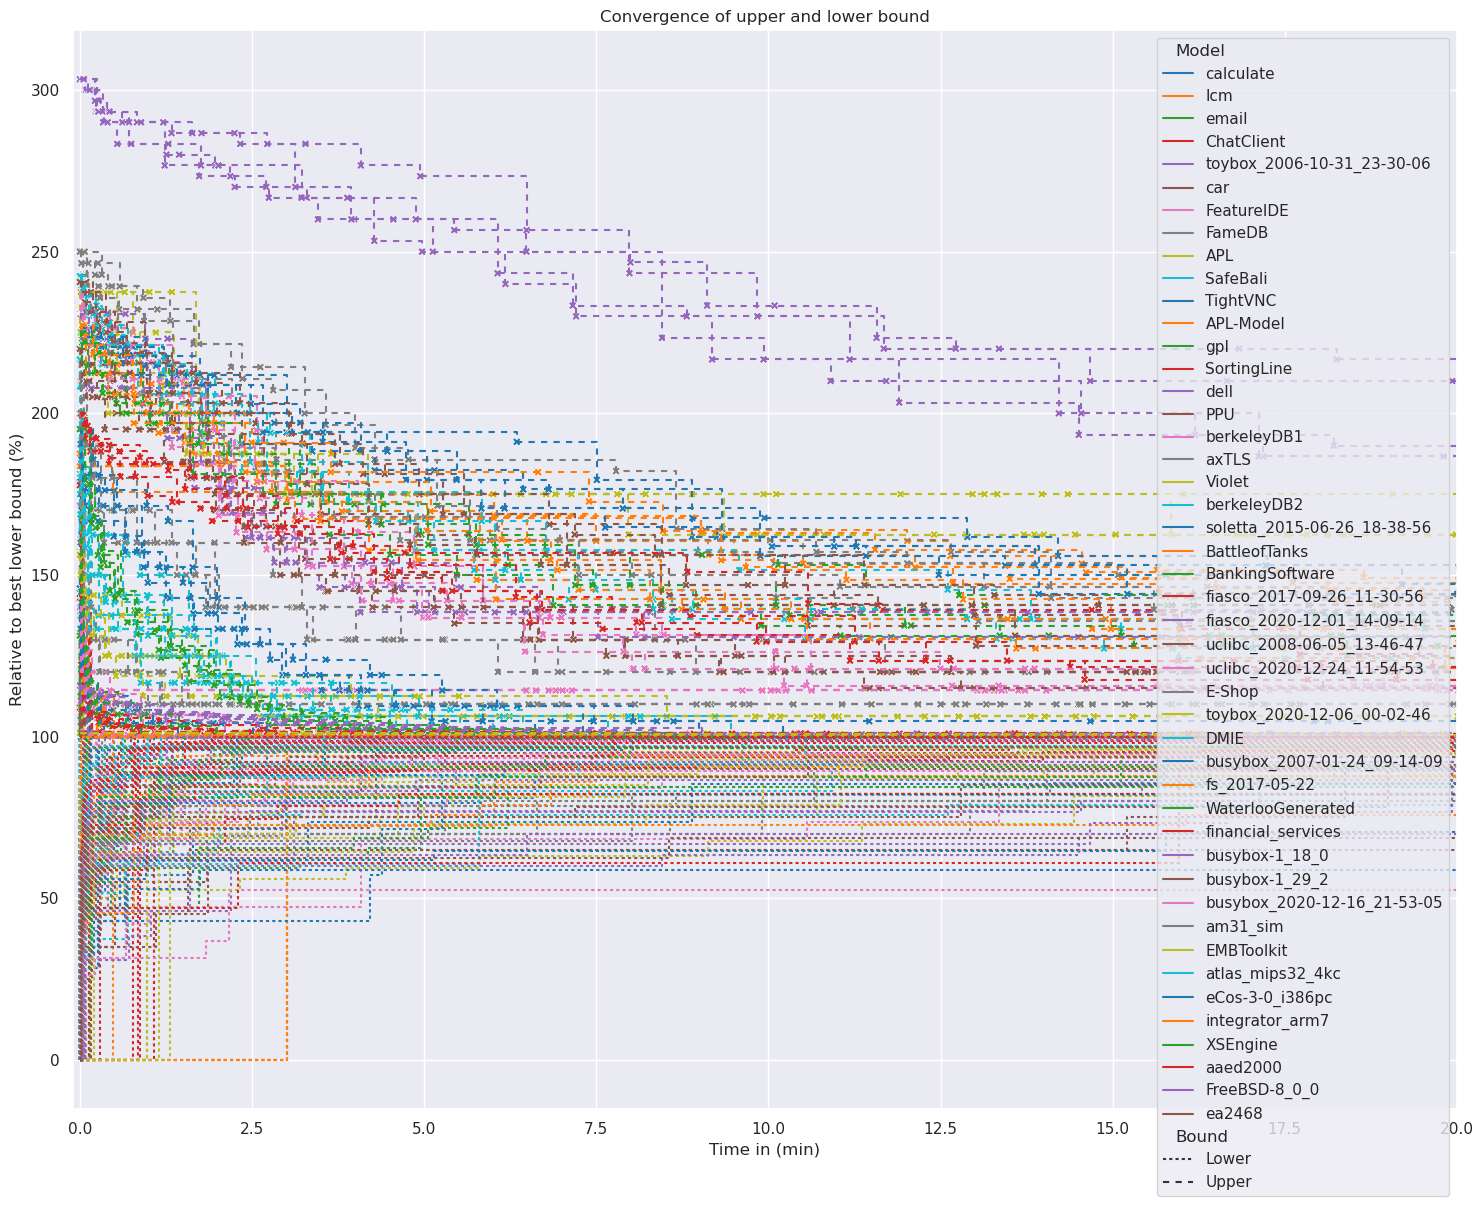

In [12]:
plt.figure(figsize=(15, 13))
plot_lb_ub_progress(t[t["instance"].isin(solved_instances)], plt.gca(), xmax=20)
plt.tight_layout()
plt.show()

### Every model with all its five runs.

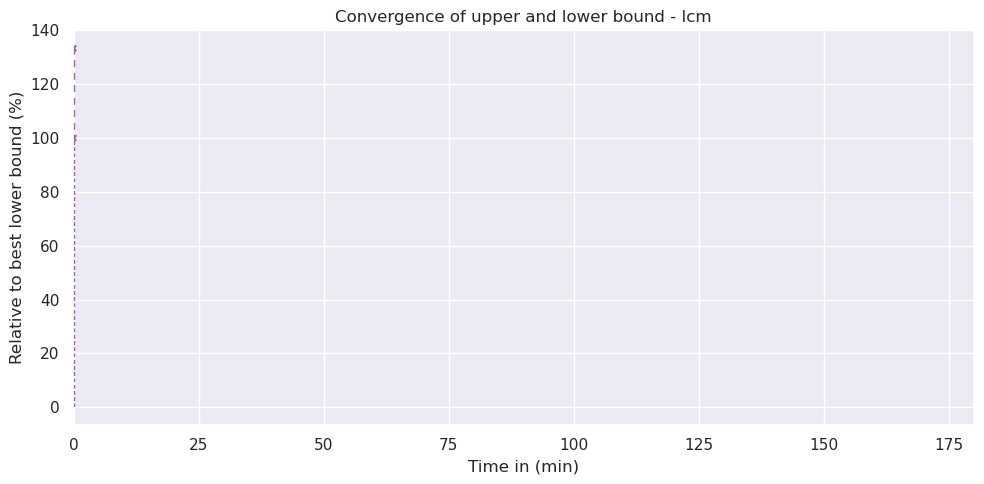

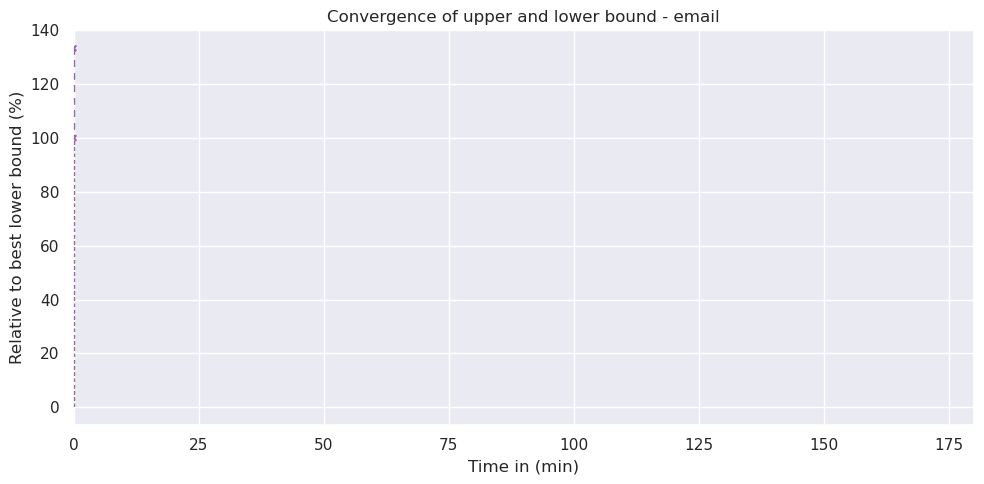

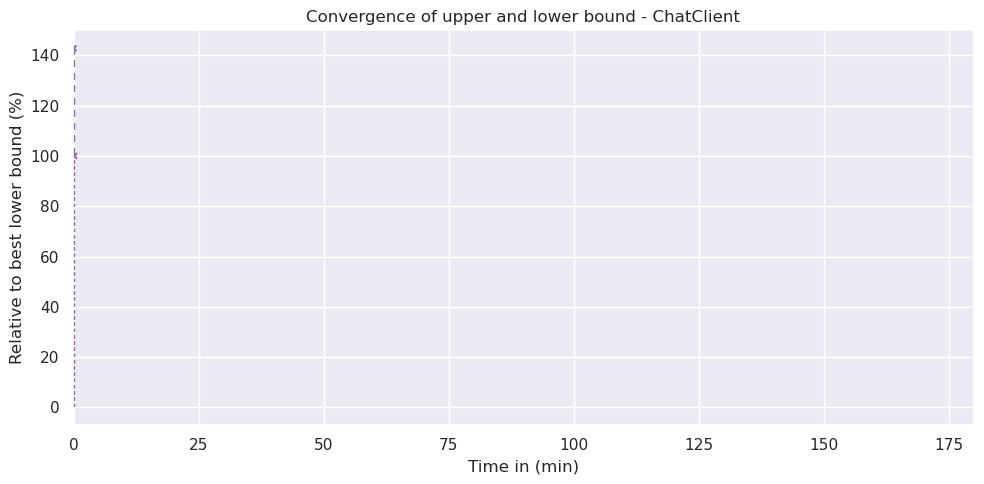

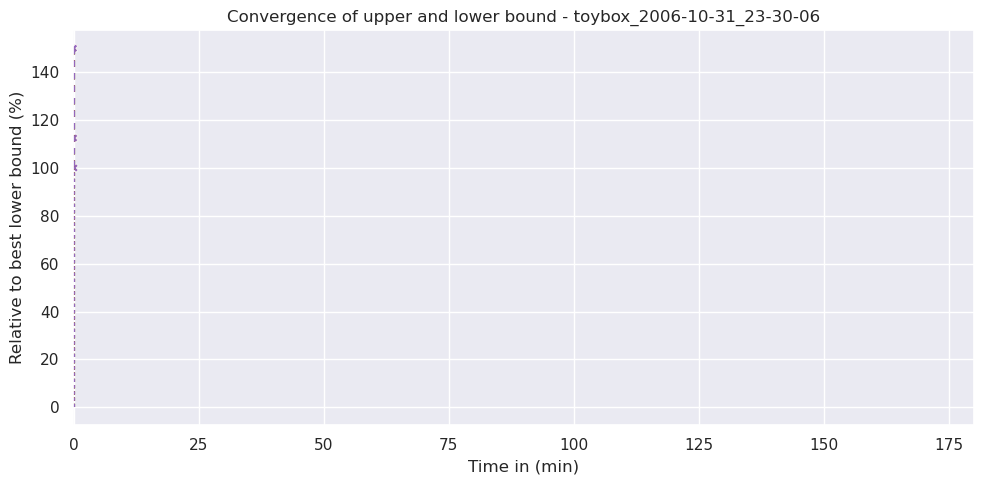

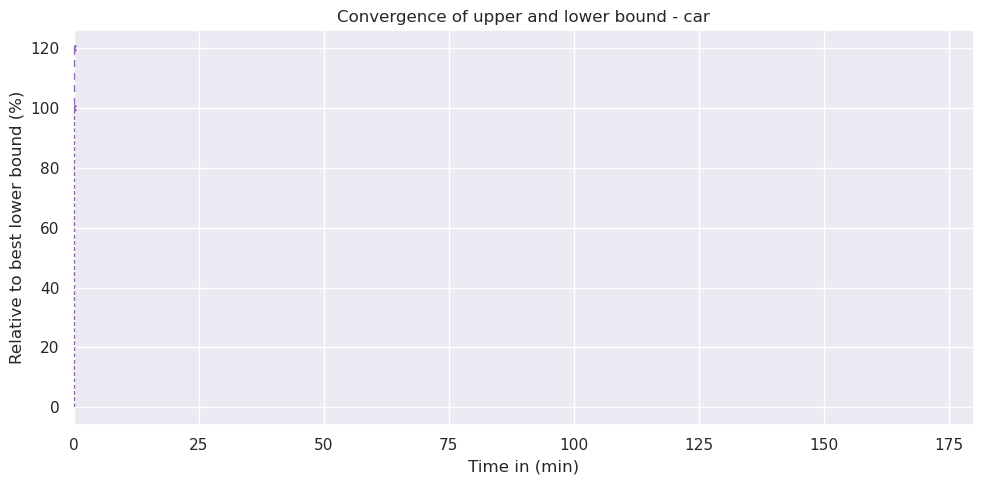

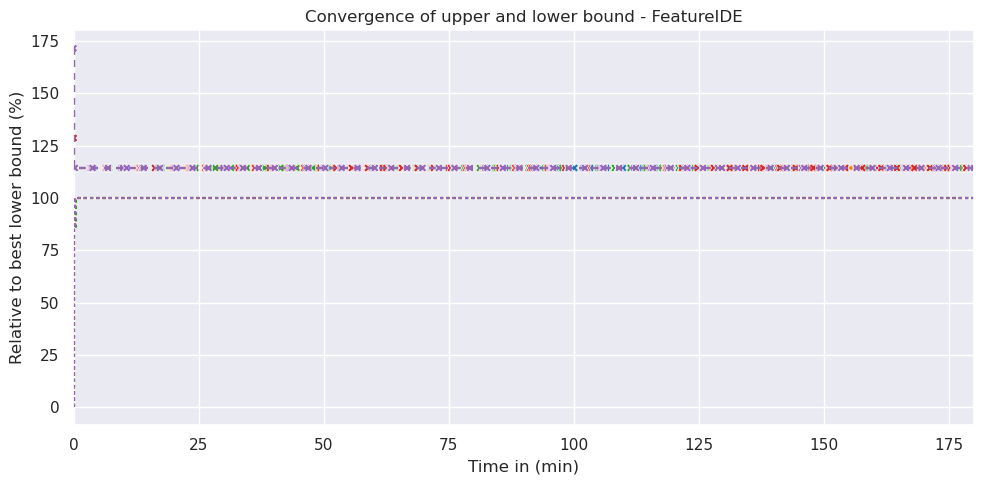

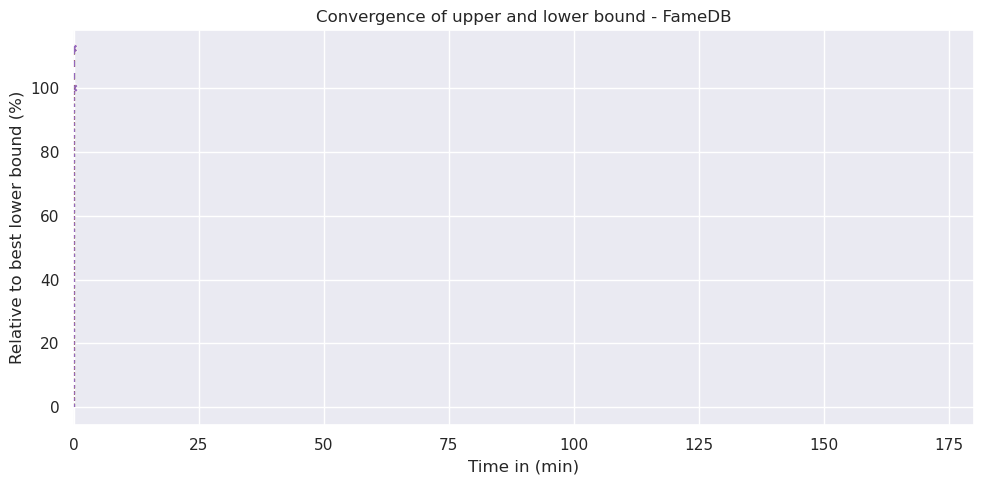

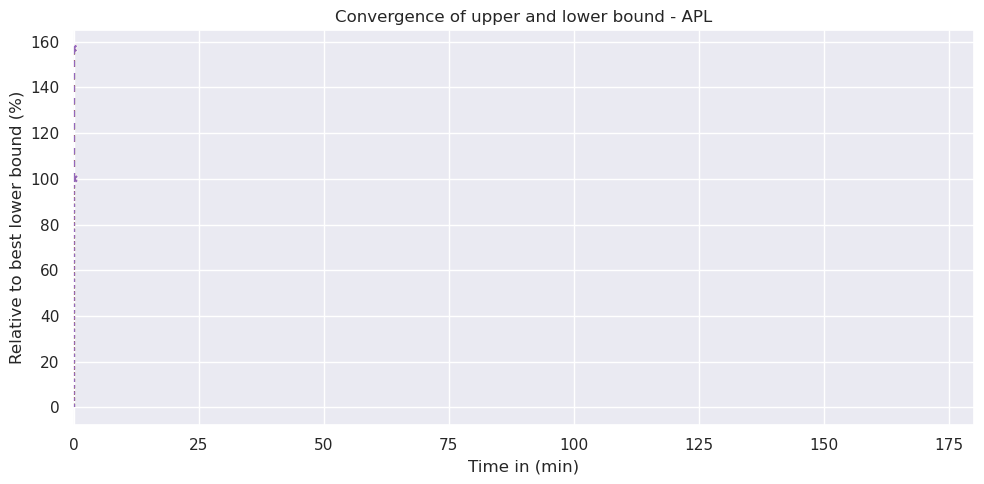

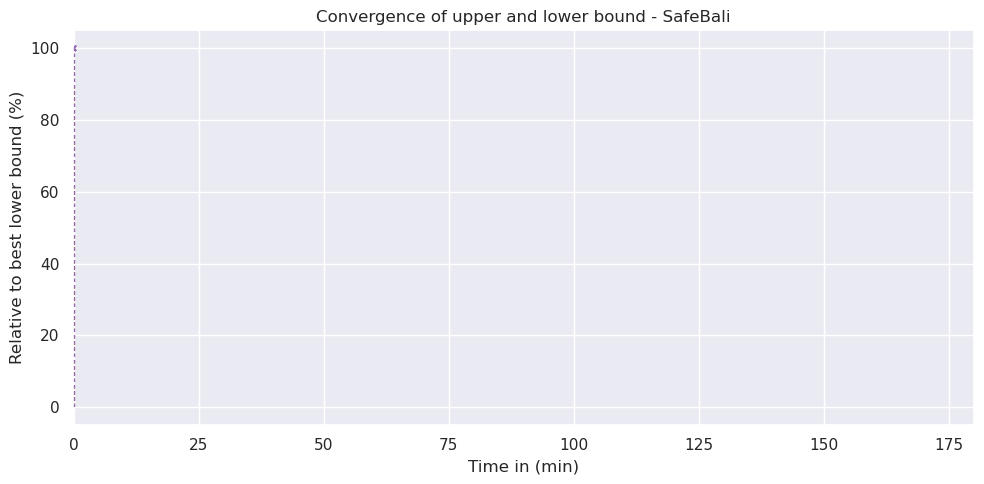

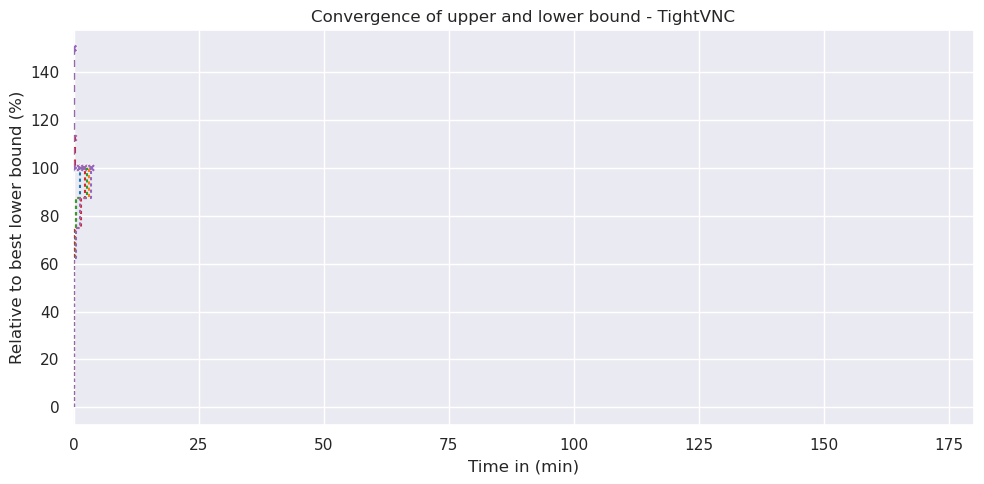

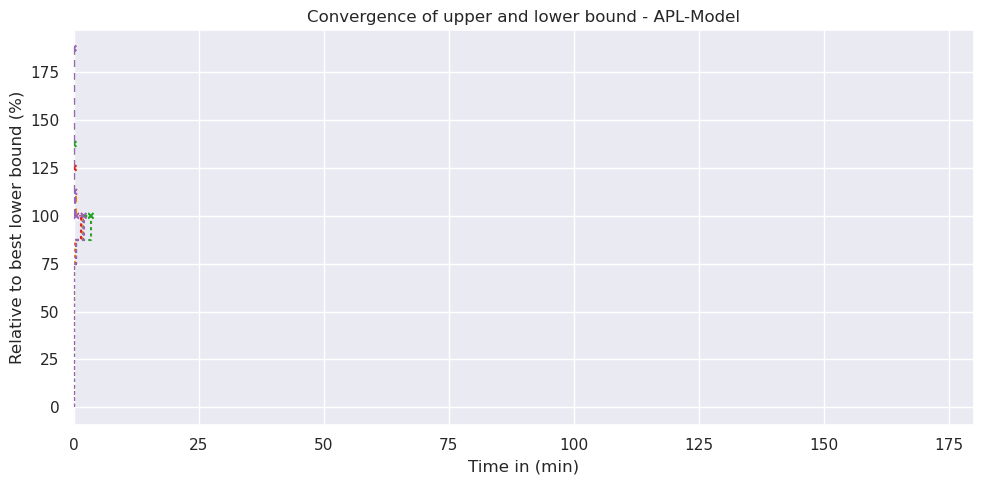

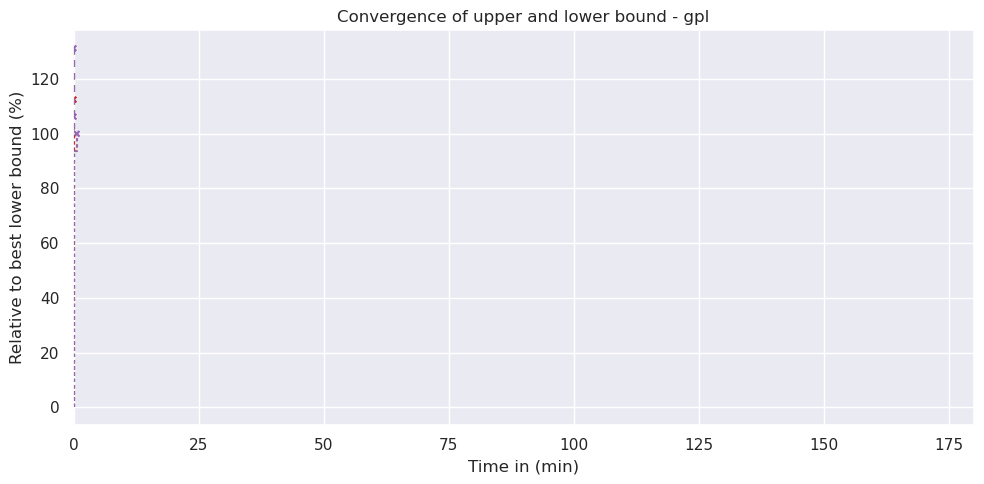

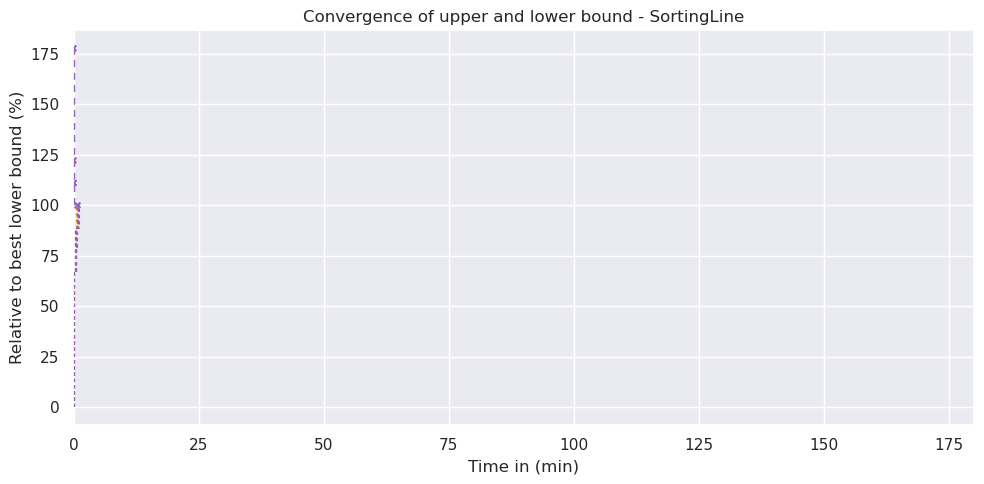

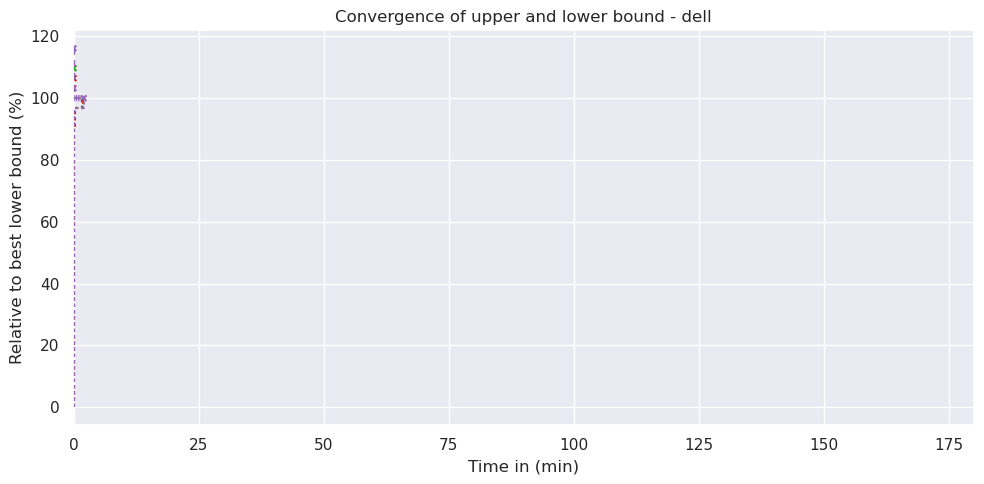

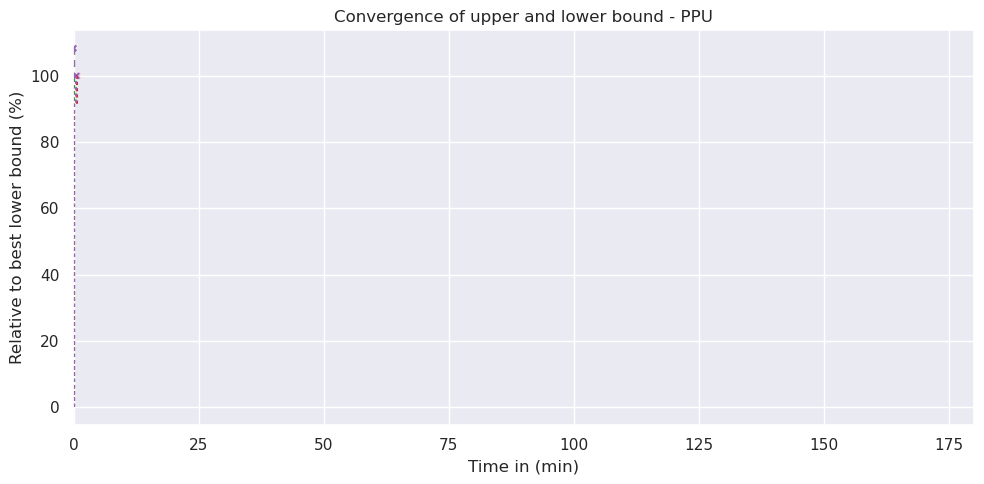

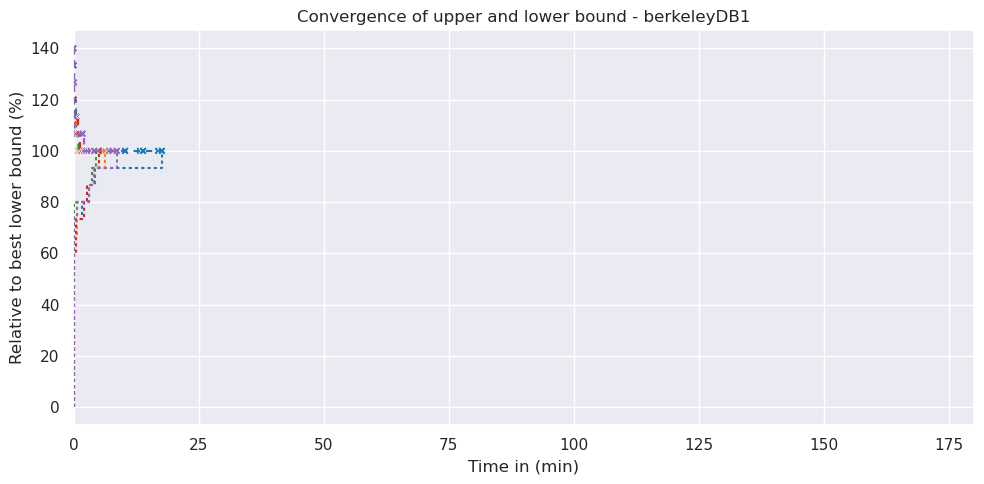

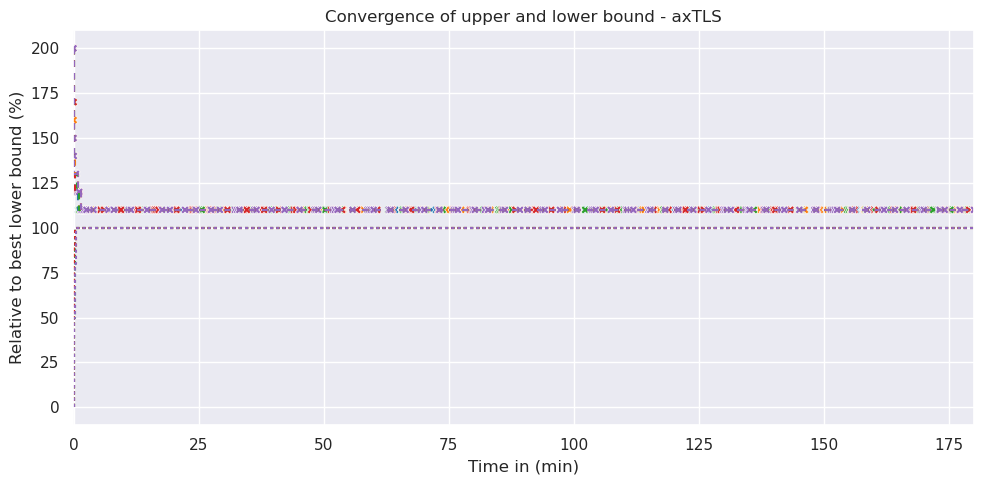

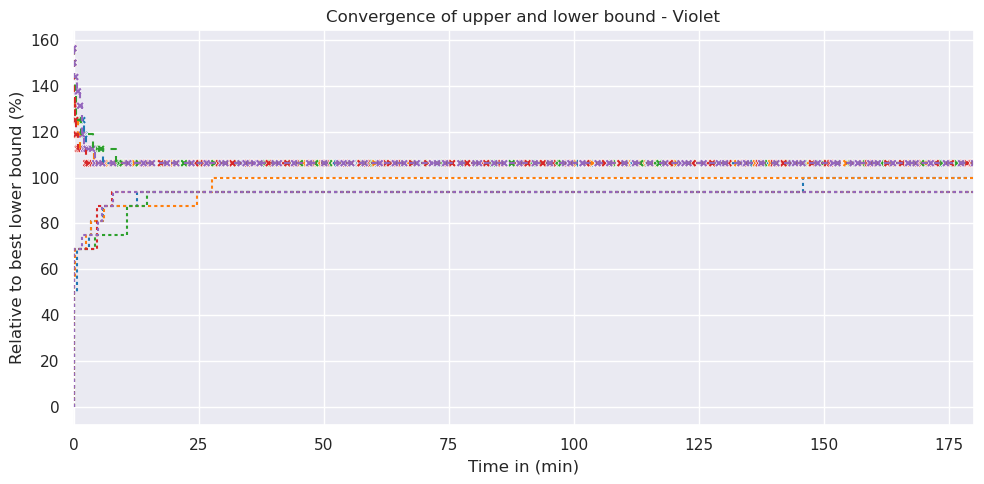

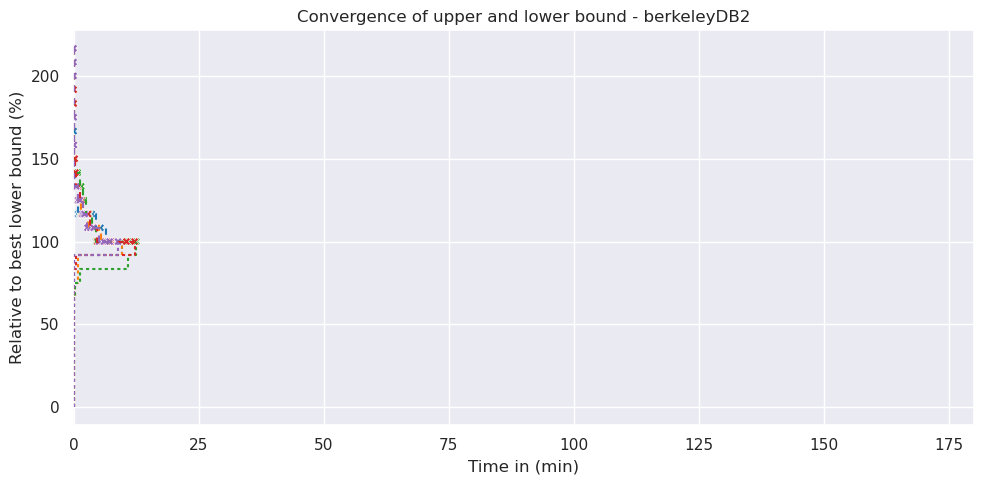

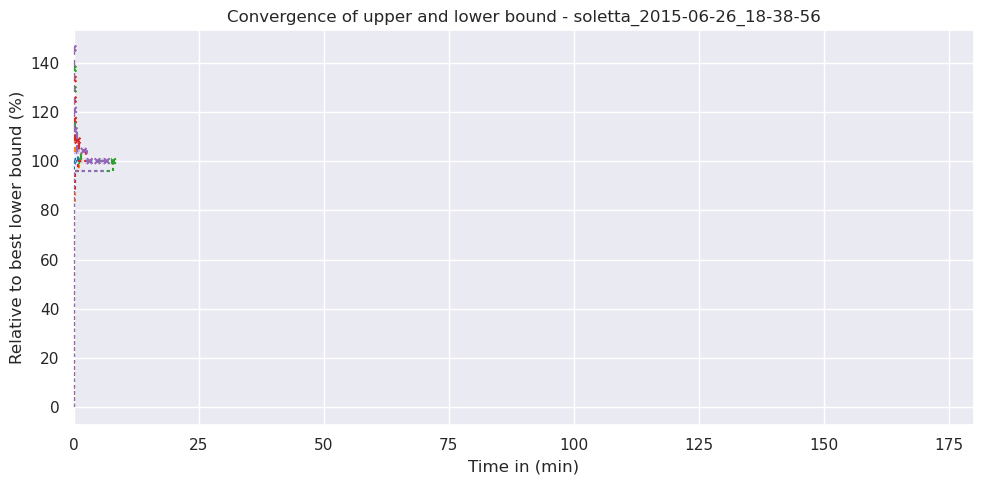

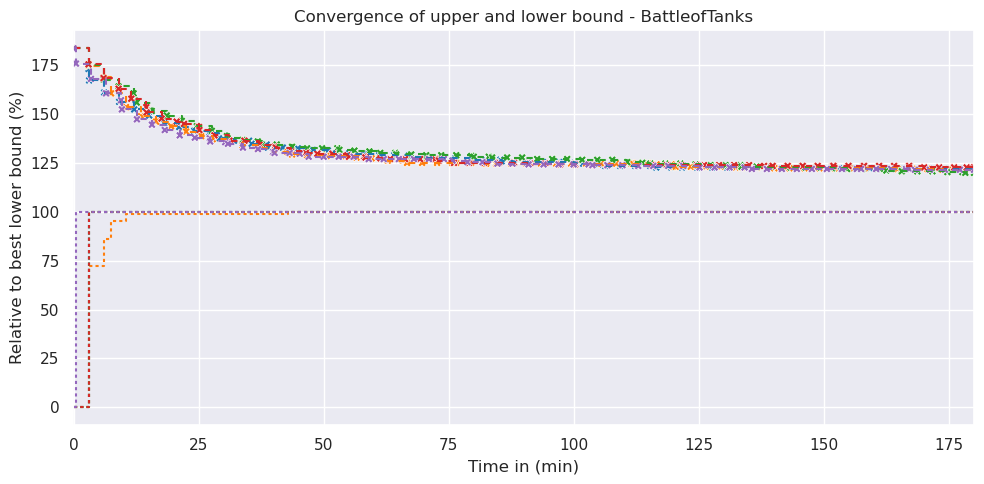

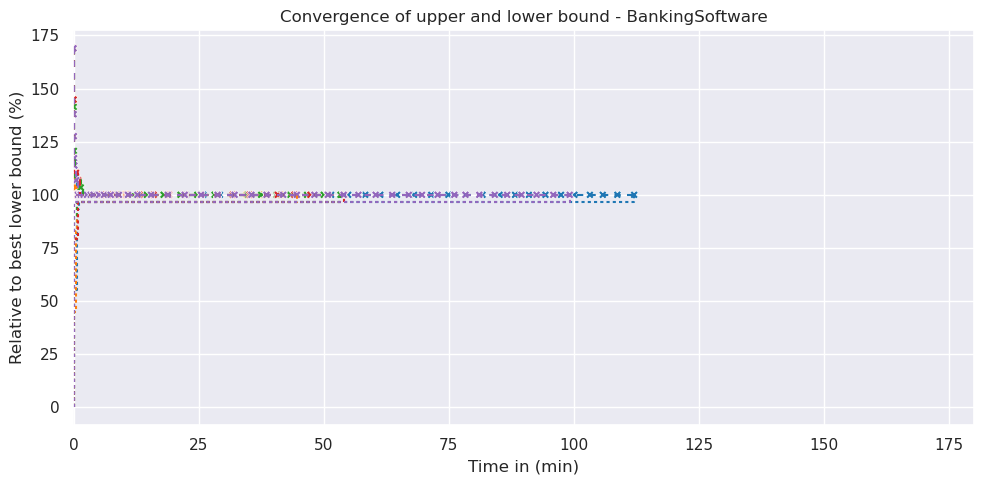

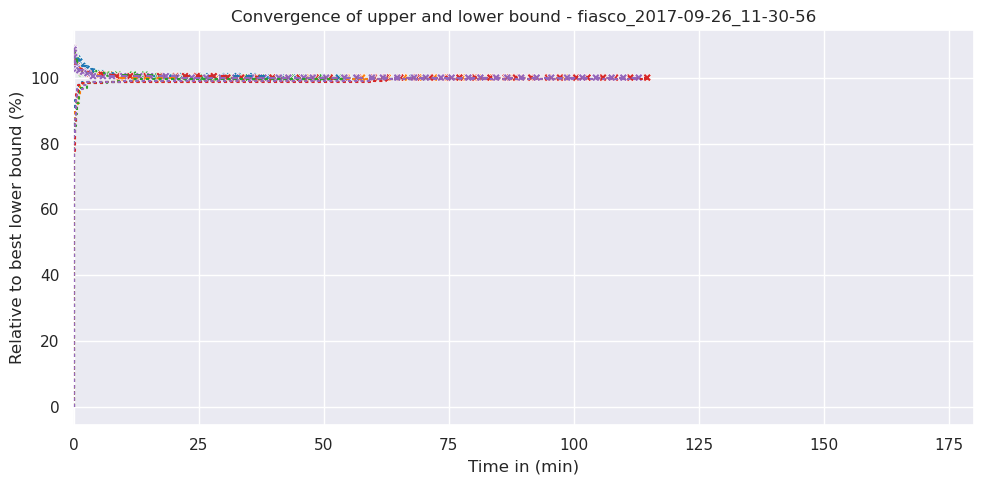

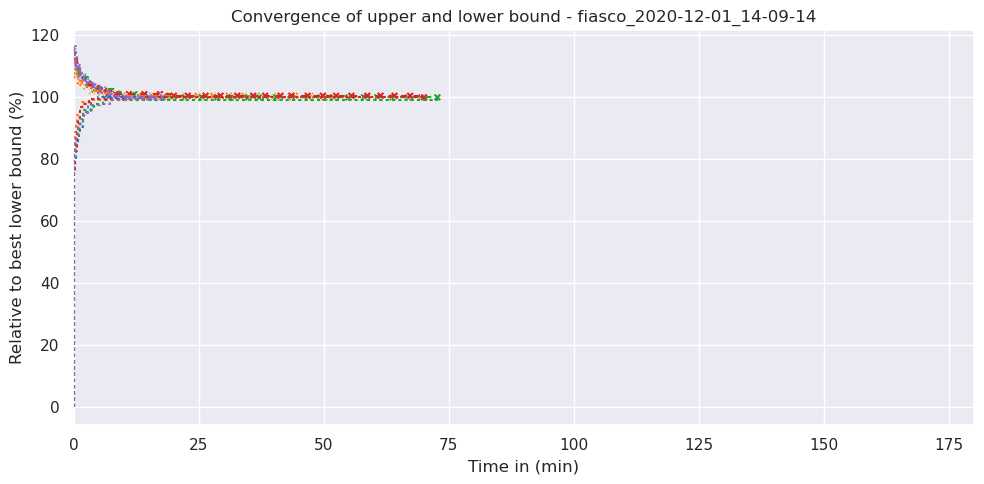

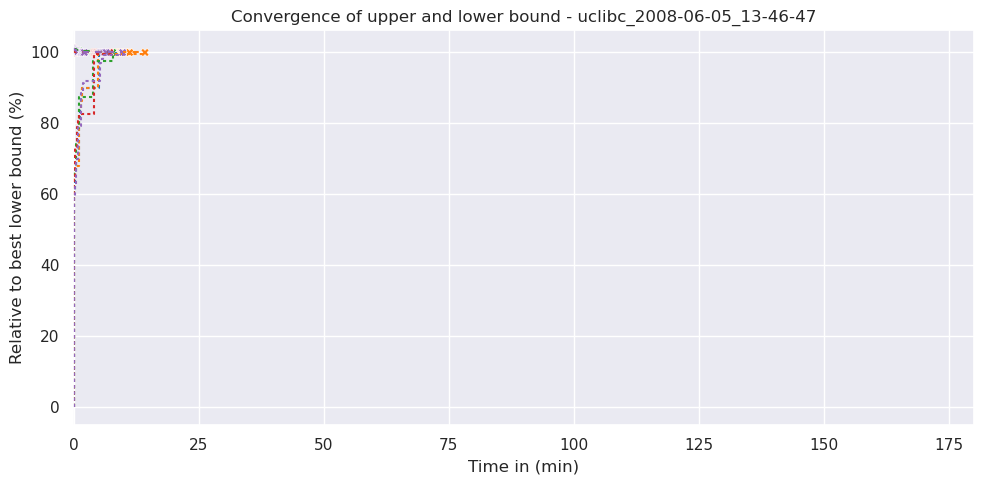

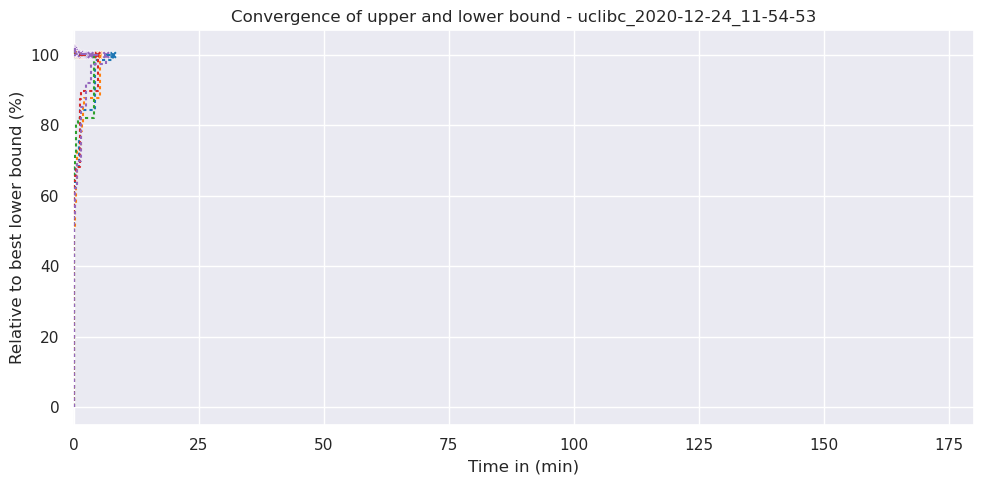

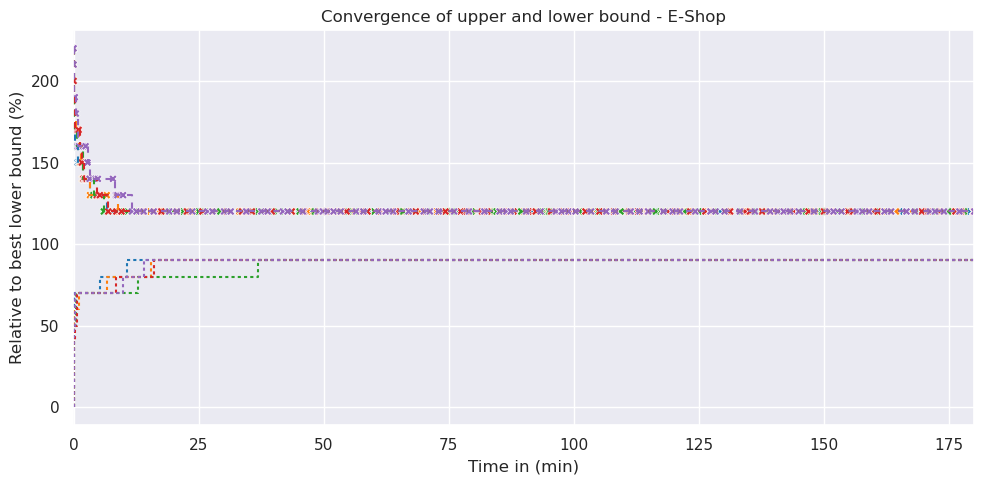

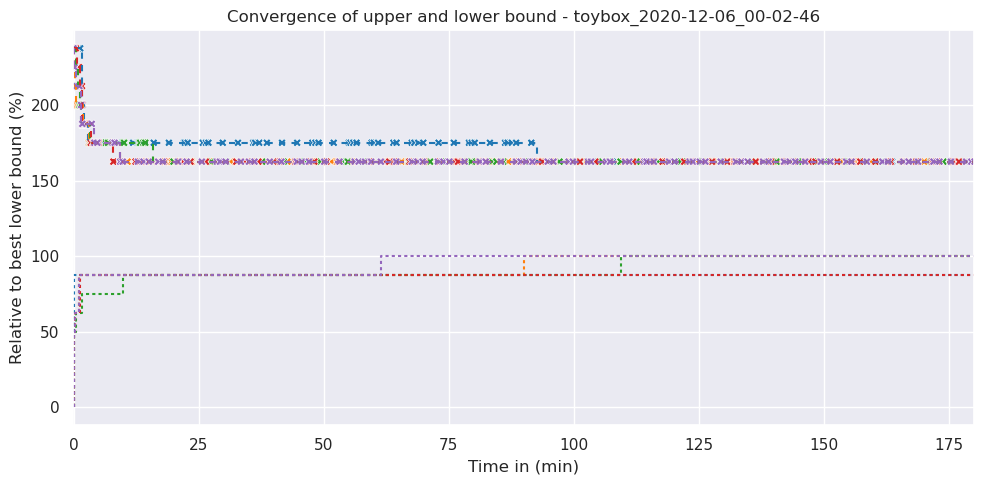

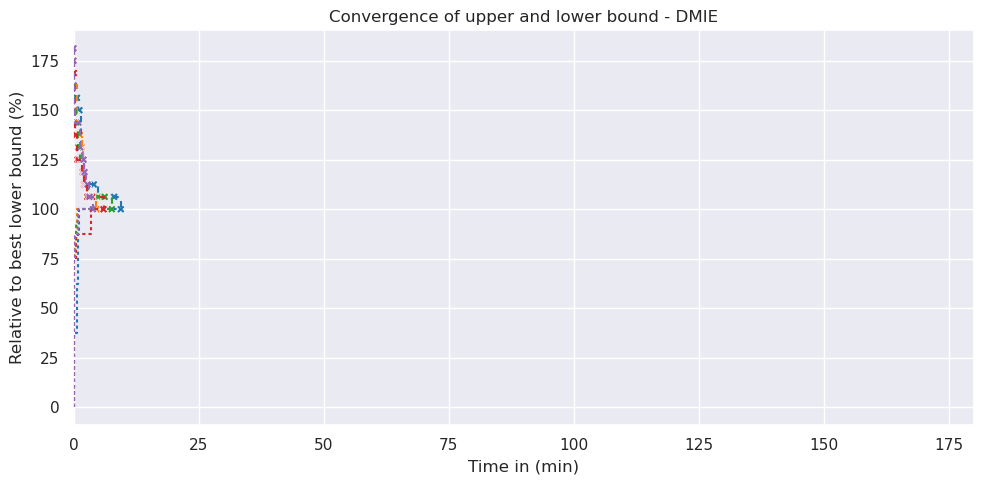

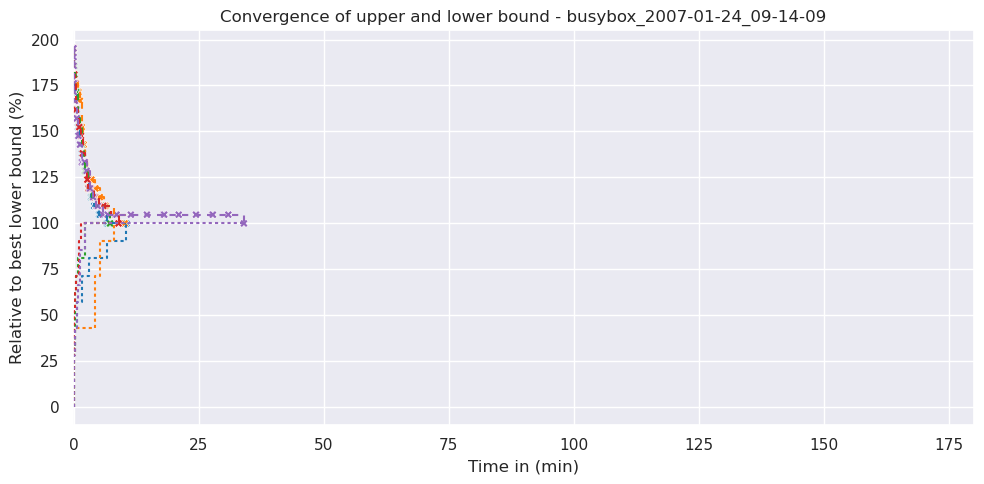

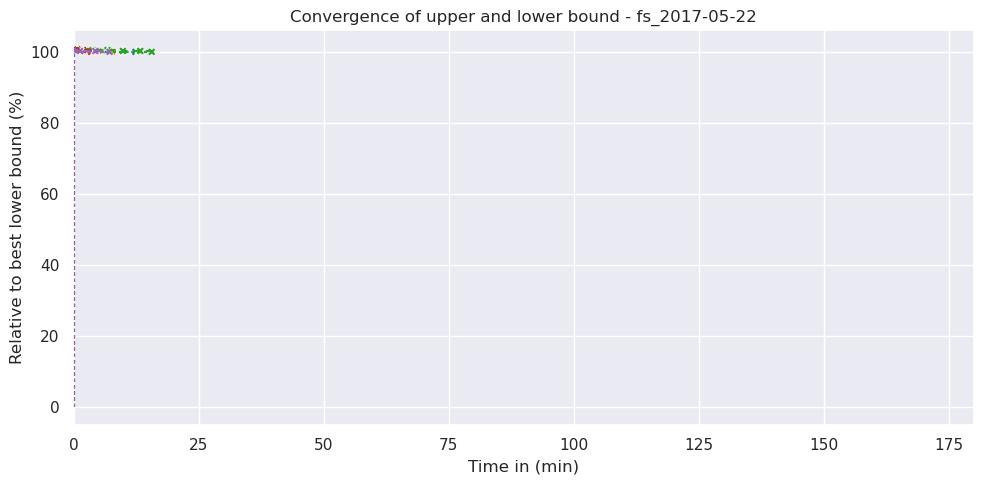

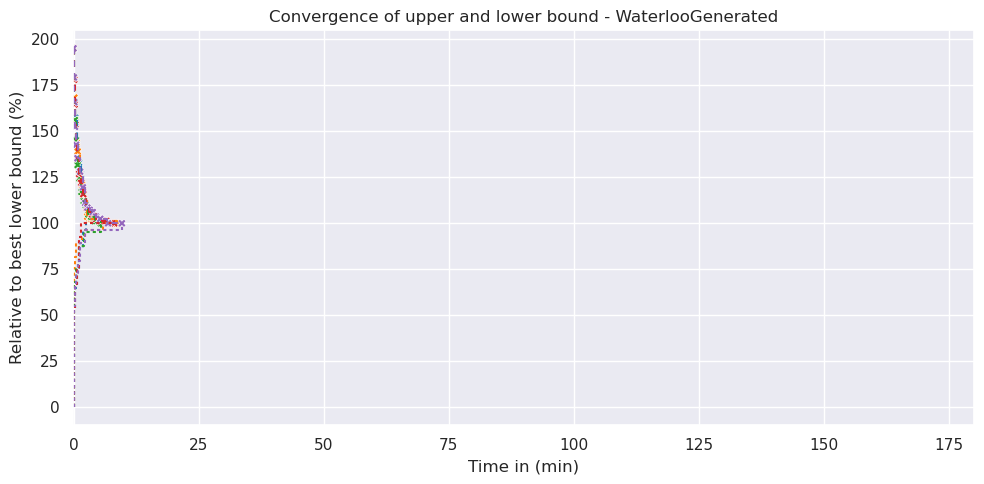

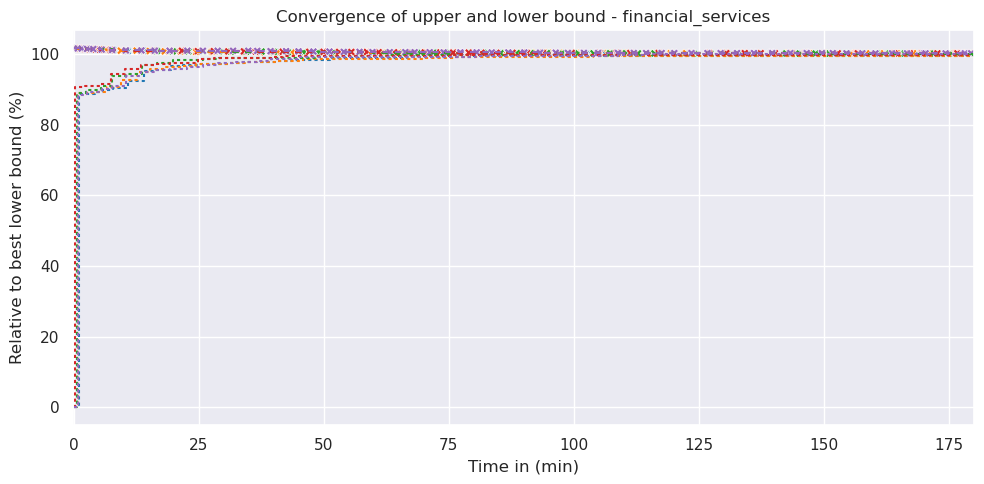

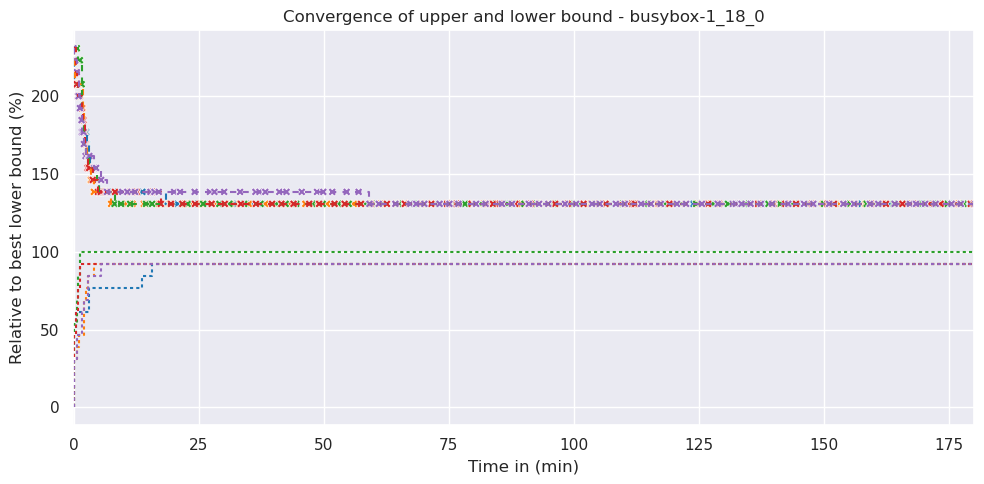

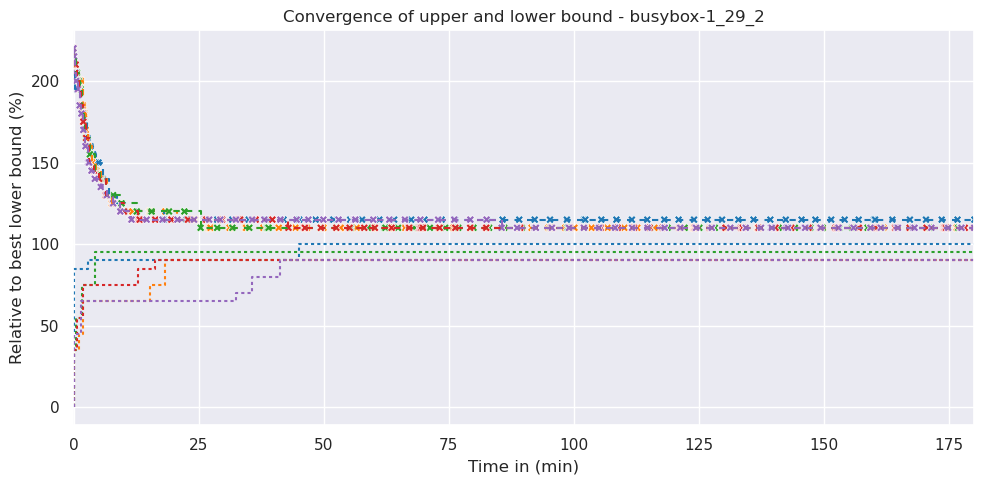

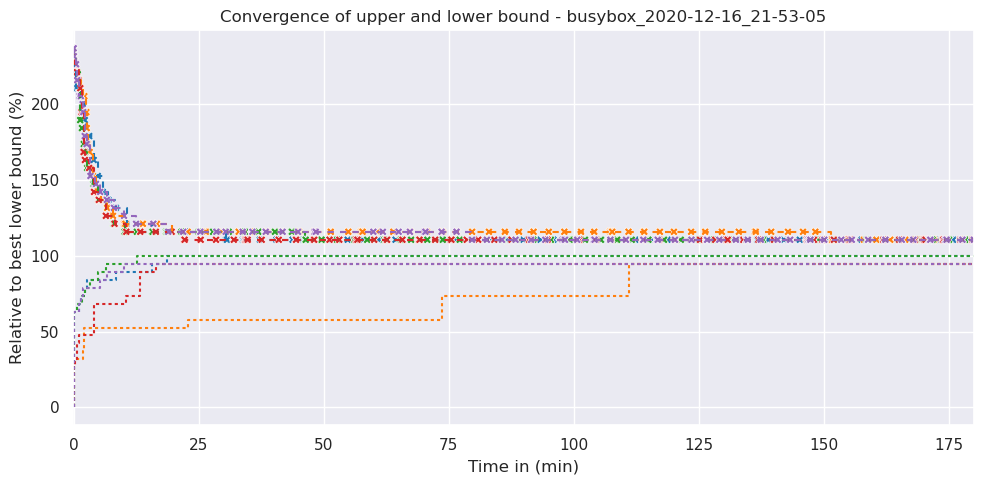

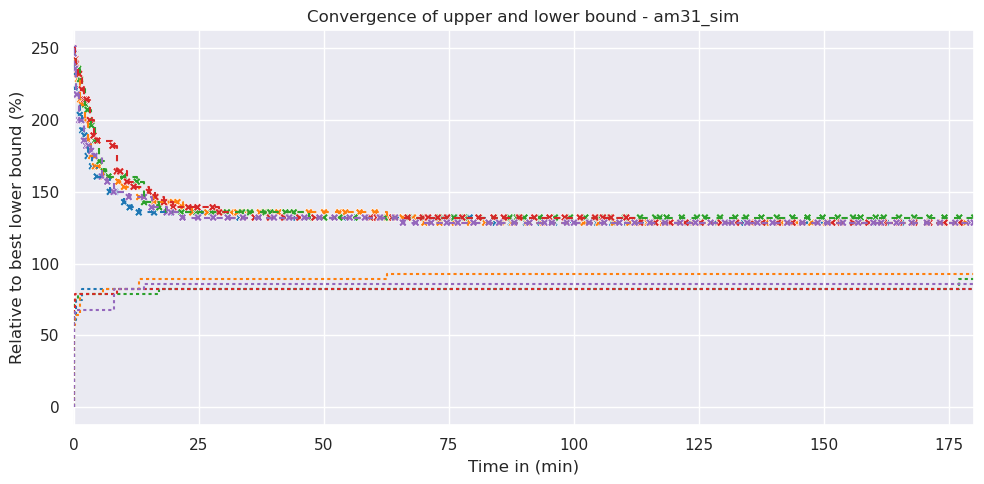

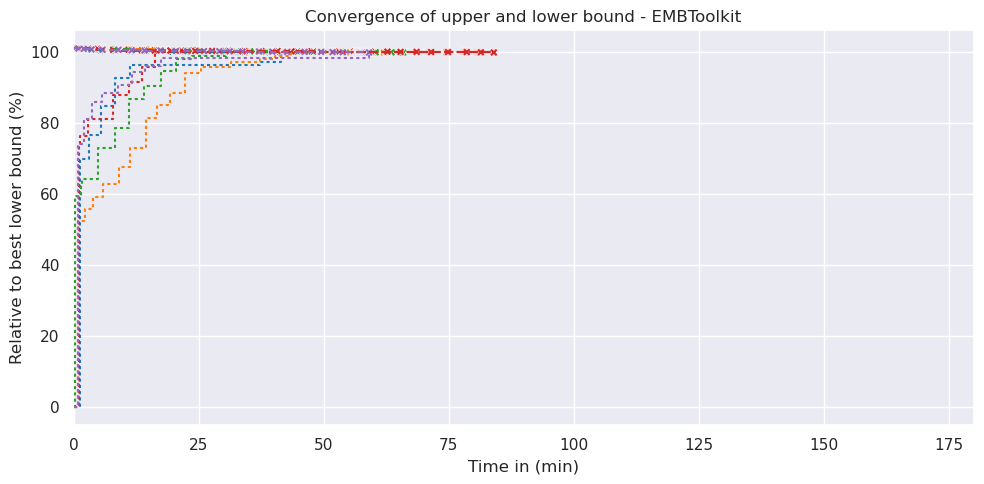

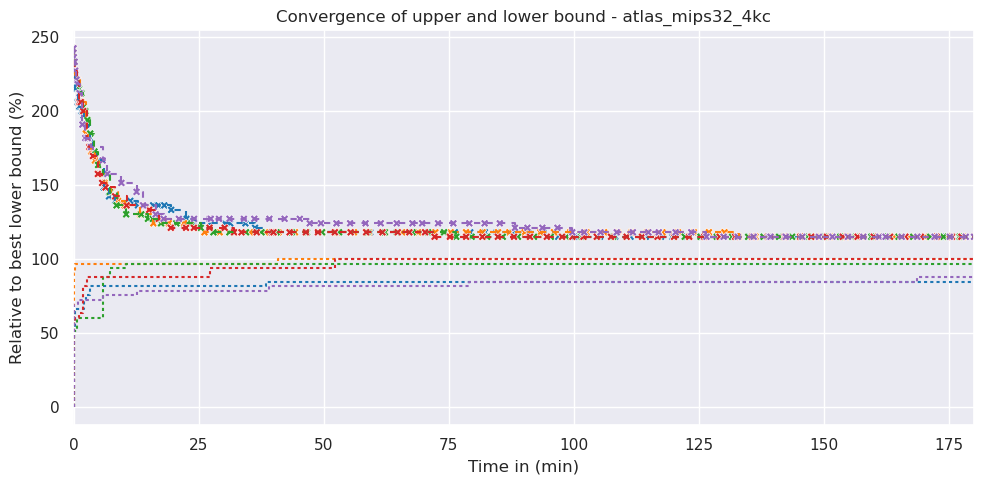

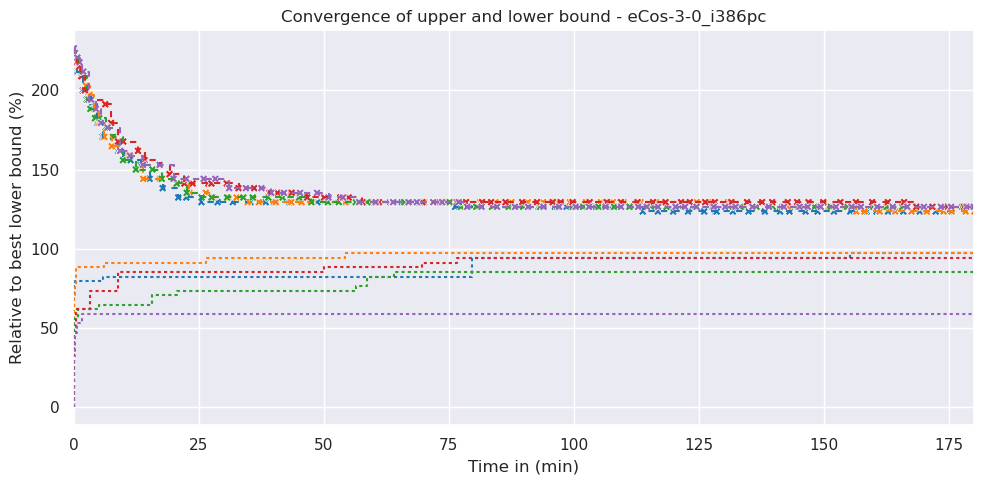

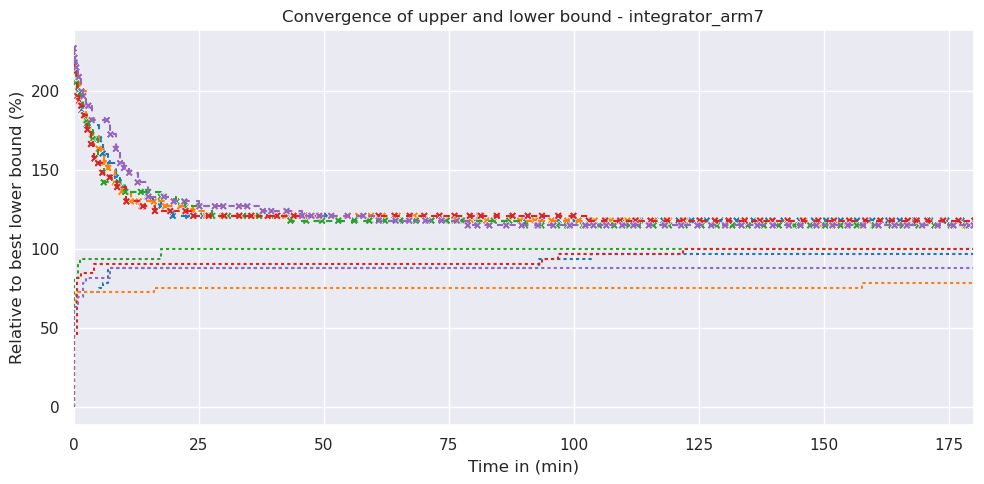

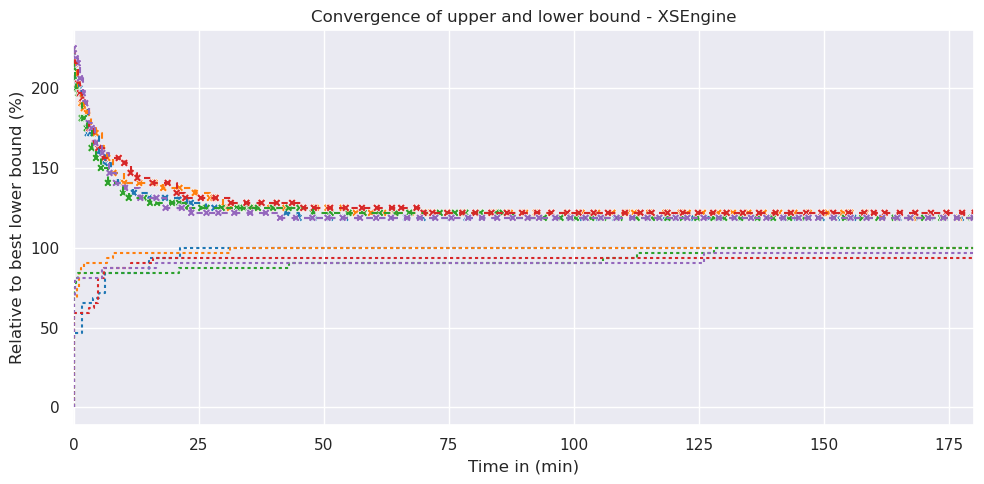

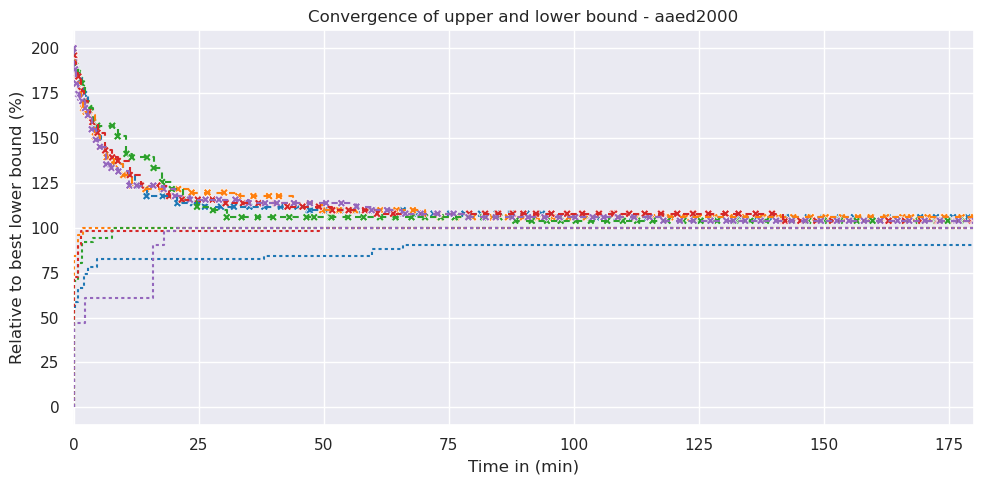

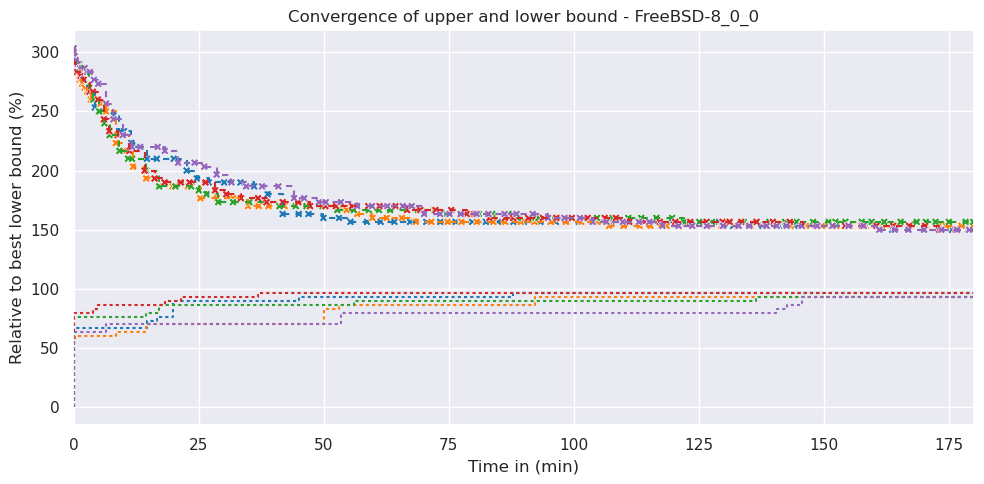

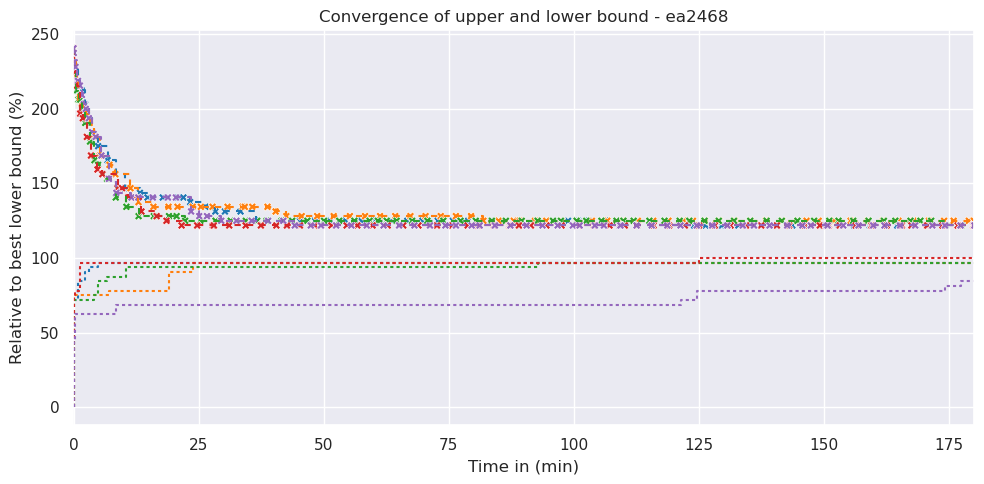

In [13]:
for i in range(1, len(solved_instances), 1):
    plt.figure(figsize=(10, 5))
    plot_lb_ub_progress(
        t[t["instance"].isin(solved_instances[i : i + 1])],
        plt.gca(),
        xmax=180,
        single_instance=True,
    )
    plt.tight_layout()
    plt.show()

## Looking onto a selection of instances in a single plot

In [14]:
ec = EventCollector()
selection = [
    "PPU",
    # small, optimal initial sample, no improvement, reached lower bound, progress within seconds + largest system for which an existing sampling algorithm is optimal
    "axTLS",
    # small, bad initial sample, large improvement, tight lower bound, progress for 0/1 min + smallest system that we cannot optimally solve
    "berkeleyDB2",
    # small, bad initial sample, large improvement, reached lower bound, progress for 6/3 min + one of the most significant improvements (43% + optimal afterwards)
    "fs_2017-05-22",
    # medium, good initial sample, small improvement, tight lower bound, progress for 0/10 min + smallest improvement (near-optimal sample still improved)
    "busybox_2020-12-16_21-53-05",
    # medium, bad initial sample, improvement over ~6 minutes, quick progress on lb.
    "FreeBSD-8_0_0"
    # medium, bad initial sample, large improvement, far lower bound, progress for 15/15 min + system with the largest remaining gap between LB=30 and sample=59 (almost 100%)
]
data[data["instance_name"].isin(selection)].drop_duplicates(
    subset=["instance_name"]
).sort_values(by=["num_vars", "num_clauses"]).apply(ec, axis=1)
t_selected = pd.DataFrame(ec.events)
t_selected["instance"] = t_selected["instance"].apply(lambda s: s[:15])

num_vars                                                                    52
num_clauses                                                                109
baseline_alg                                                         FIDE-YASA
baseline_alg_conf                                                   t2_m1_null
runtime_baseline                                                           289
baseline_sample_size                                                        13
path_to_baseline_sample                2023-03-01_13-51-03/16_1_3_5_sample.csv
archive_path                             ./EXTERNAL_INPUT/900_seconds_5_it.zip
parameters                   {'func': 'run_samplns', 'args': {'instance_nam...
instance_name                                                              PPU
lower_bound                                                                 12
upper_bound                                                                 12
iteration_info               [{'nbrhd_tuples': 164, 

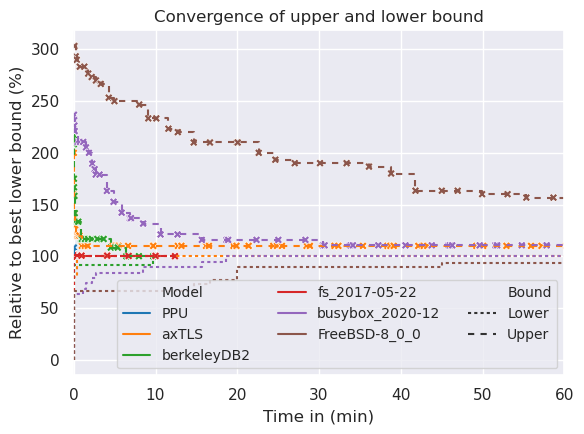

In [15]:
plt.figure(figsize=(6, 4.5))
plot_lb_ub_progress(t_selected, plt.gca(), xmax=60)
plt.legend(ncols=3, loc="lower right", prop={"size": 10})
plt.tight_layout()
plt.savefig("./plots/01_12_convergence_of_selected_models.pdf")
plt.show()

## Time of last change

To get a better grasp of the necessary time.

In [16]:
time_until_last_change = (
    t[t["final"] & (t["instance"].isin(solved_instances))]
    .groupby(["instance", "path", "type"])[["time"]]
    .min()
    .reset_index()
    .groupby(["instance", "type"])[["time"]]
    .mean()
)
time_until_last_change

time
instance                   type            
APL                        Lower   0.128374
                           Upper   0.038853
APL-Model                  Lower   2.095375
                           Upper   0.348868
BankingSoftware            Lower  72.695062
...                                     ...
toybox_2020-12-06_00-02-46 Upper  27.039110
uclibc_2008-06-05_13-46-47 Lower   9.548287
                           Upper   1.629486
uclibc_2020-12-24_11-54-53 Lower   5.725083
                           Upper   1.241885

[92 rows x 1 columns]

In [17]:
(time_until_last_change.groupby("instance")[["time"]].max() < 3).sum()

time    18
dtype: int64

In [18]:
time_until_last_change.reset_index().groupby("type")[["time"]].mean()

time
type            
Lower  25.374705
Upper  31.850122